In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('../data/raw/dataset.csv')

print(f"Row: {df.shape[0]}, Column: {df.shape[1]}")
df.head()

Satır: 114000, Sütun: 21


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [2]:
# Column info and basic statistics
print("=== COLUMN INFO ===")
print(df.info())
print("\n=== BASIC STATISTICS ===")
df.describe()

=== COLUMN INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [3]:
# Missing values check
print("=== MISSING VALUES ===")
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({'missing_count': missing, 'percentage': missing_pct})
print(missing_df[missing_df['missing_count'] > 0])

# Duplicates check
print(f"\n=== DUPLICATES ===")
print(f"Duplicate rows: {df.duplicated().sum()}")
print(f"Duplicate track_id: {df['track_id'].duplicated().sum()}")

=== MISSING VALUES ===
            missing_count  percentage
artists                 1         0.0
album_name              1         0.0
track_name              1         0.0

=== DUPLICATES ===
Duplicate rows: 0
Duplicate track_id: 24259


In [4]:
# Drop unnecessary column
df = df.drop('Unnamed: 0', axis=1)

# Check the 1 missing row
print("=== ROW WITH MISSING VALUES ===")
print(df[df.isnull().any(axis=1)])

# Drop missing (only 1 row)
df = df.dropna()
print(f"\nAfter dropping missing: {df.shape[0]} rows")

# Handle duplicate track_ids - keep first occurrence
df = df.drop_duplicates(subset='track_id', keep='first')
print(f"After dropping duplicate track_ids: {df.shape[0]} rows")

# Final shape
print(f"\n=== FINAL DATASET ===")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

=== ROW WITH MISSING VALUES ===
                     track_id artists album_name track_name  popularity  \
65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN           0   

       duration_ms  explicit  danceability  energy  key  loudness  mode  \
65900            0     False         0.501   0.583    7     -9.46     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
65900       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature track_genre  
65900  138.391               4       k-pop  

After dropping missing: 113999 rows
After dropping duplicate track_ids: 89740 rows

=== FINAL DATASET ===
Rows: 89740, Columns: 20


## Audio Features Description
- **danceability**: 0-1, how suitable for dancing
- **energy**: 0-1, intensity and activity
- **loudness**: dB, typical -60 to 0
- **speechiness**: 0-1, presence of spoken words
- **acousticness**: 0-1, acoustic confidence
- **instrumentalness**: 0-1, no vocals prediction
- **liveness**: 0-1, audience presence
- **valence**: 0-1, positiveness (happy vs sad)
- **tempo**: BPM

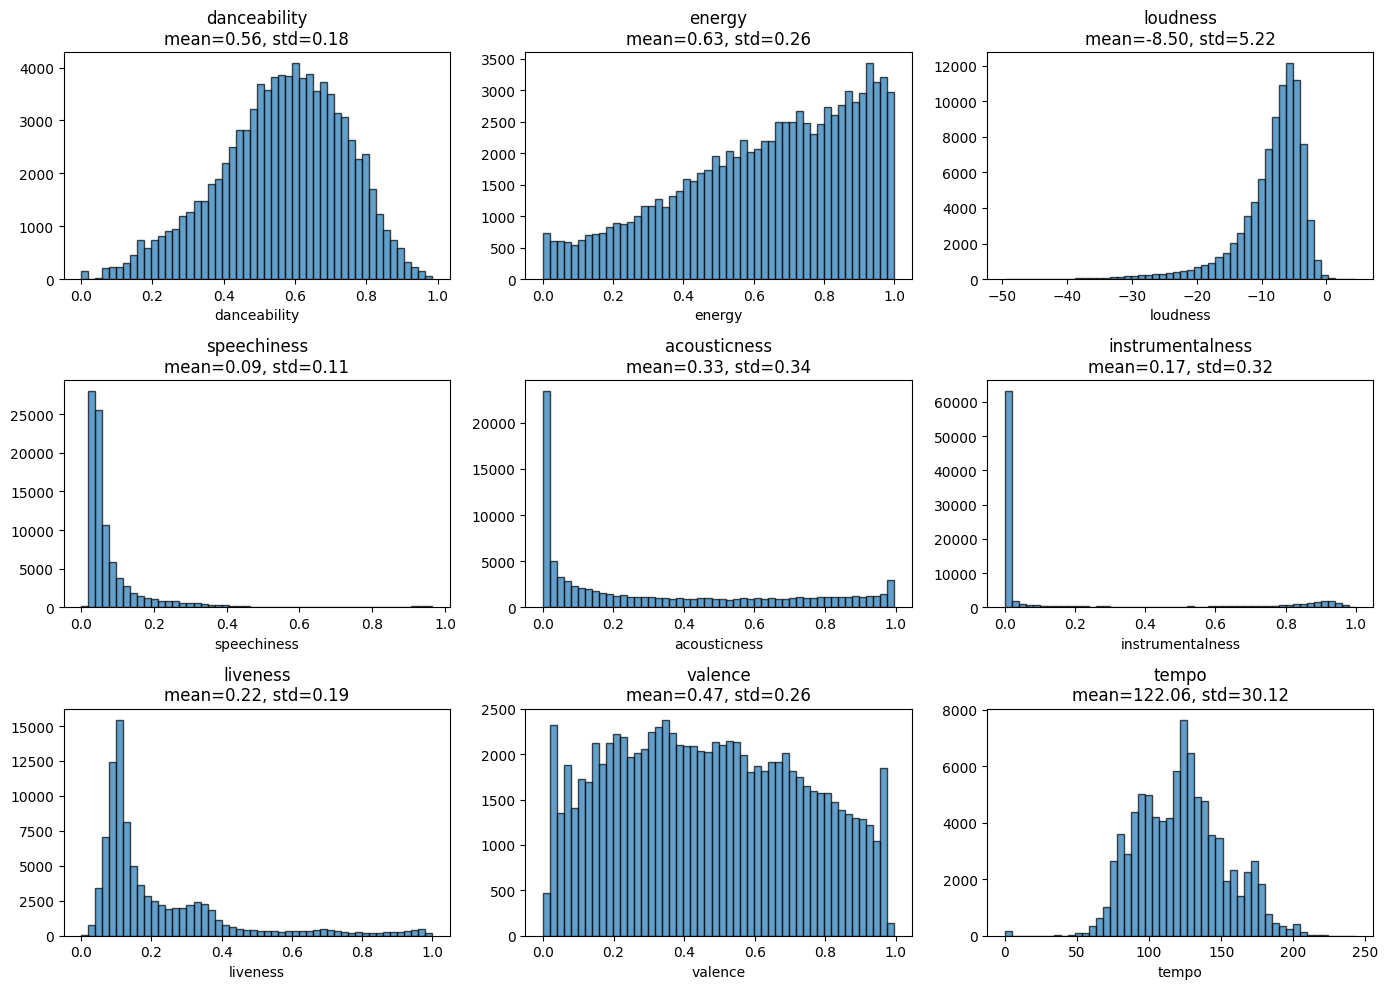

In [5]:
# Numeric columns for analysis
audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

fig, axes = plt.subplots(3, 3, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(audio_features):
    axes[i].hist(df[col], bins=50, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'{col}\nmean={df[col].mean():.2f}, std={df[col].std():.2f}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.savefig('../images/audio_features_distribution.png', dpi=150)
plt.show()

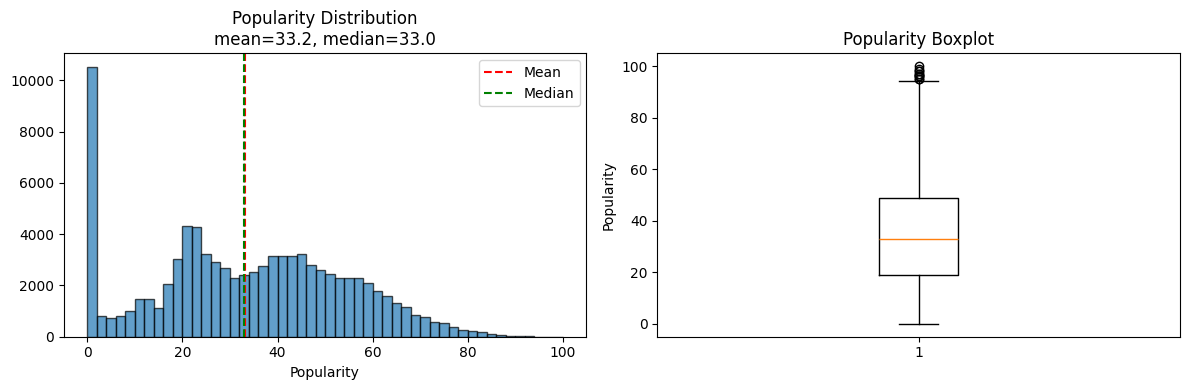

=== POPULARITY BREAKDOWN ===
Zero popularity: 9447 (10.5%)
Low (1-25): 25434
Medium (26-50): 34912
High (51-75): 18665
Very High (76-100): 1282


In [6]:
# Popularity distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram
axes[0].hist(df['popularity'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title(f'Popularity Distribution\nmean={df["popularity"].mean():.1f}, median={df["popularity"].median():.1f}')
axes[0].set_xlabel('Popularity')
axes[0].axvline(df['popularity'].mean(), color='red', linestyle='--', label='Mean')
axes[0].axvline(df['popularity'].median(), color='green', linestyle='--', label='Median')
axes[0].legend()

# Boxplot
axes[1].boxplot(df['popularity'], vert=True)
axes[1].set_title('Popularity Boxplot')
axes[1].set_ylabel('Popularity')

plt.tight_layout()
plt.savefig('../images/popularity_distribution.png', dpi=150)
plt.show()

# Popularity categories
print("=== POPULARITY BREAKDOWN ===")
print(f"Zero popularity: {(df['popularity'] == 0).sum()} ({(df['popularity'] == 0).mean()*100:.1f}%)")
print(f"Low (1-25): {((df['popularity'] > 0) & (df['popularity'] <= 25)).sum()}")
print(f"Medium (26-50): {((df['popularity'] > 25) & (df['popularity'] <= 50)).sum()}")
print(f"High (51-75): {((df['popularity'] > 50) & (df['popularity'] <= 75)).sum()}")
print(f"Very High (76-100): {(df['popularity'] > 75).sum()}")

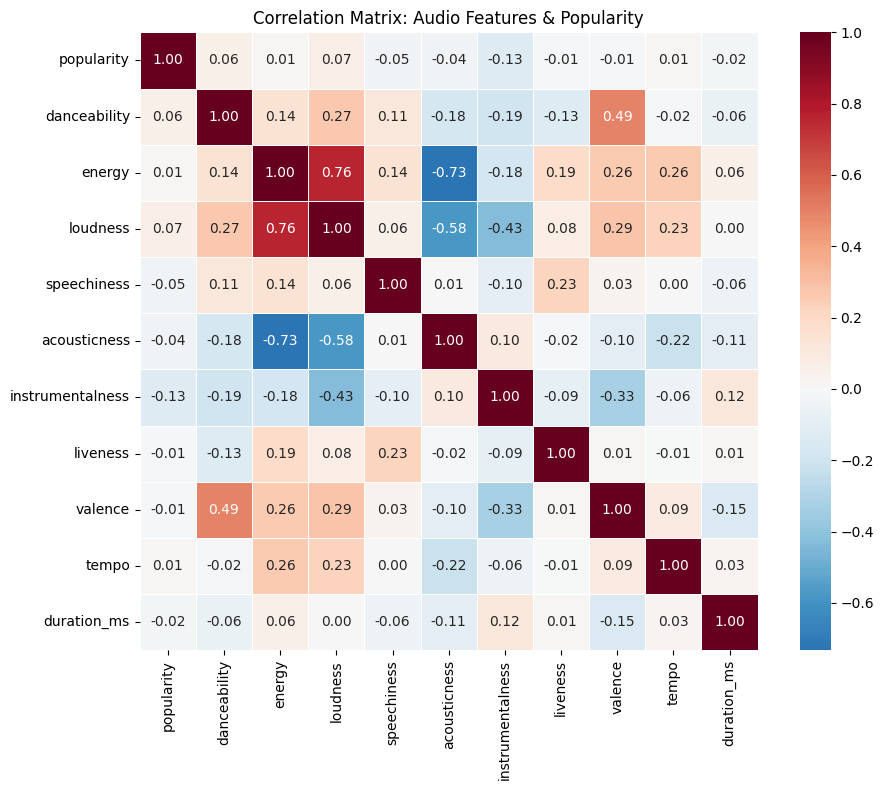

=== CORRELATIONS WITH POPULARITY ===
instrumentalness   -0.127477
loudness            0.071674
danceability        0.064275
speechiness        -0.047086
acousticness       -0.038828
duration_ms        -0.023157
liveness           -0.013857
energy              0.013725
valence            -0.011508
tempo               0.007280
Name: popularity, dtype: float64


In [7]:
# Correlation matrix for audio features + popularity
corr_cols = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 
             'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

corr_matrix = df[corr_cols].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, fmt='.2f', 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix: Audio Features & Popularity')
plt.tight_layout()
plt.savefig('../images/correlation_matrix.png', dpi=150)
plt.show()

# Top correlations with popularity
print("=== CORRELATIONS WITH POPULARITY ===")
pop_corr = corr_matrix['popularity'].drop('popularity').sort_values(key=abs, ascending=False)
print(pop_corr)

Total genres: 113

=== TOP 10 GENRES BY COUNT ===
track_genre
acoustic         1000
alt-rock          999
tango             999
ambient           999
afrobeat          999
cantopop          999
bluegrass         998
forro             998
study             998
chicago-house     998
Name: count, dtype: int64


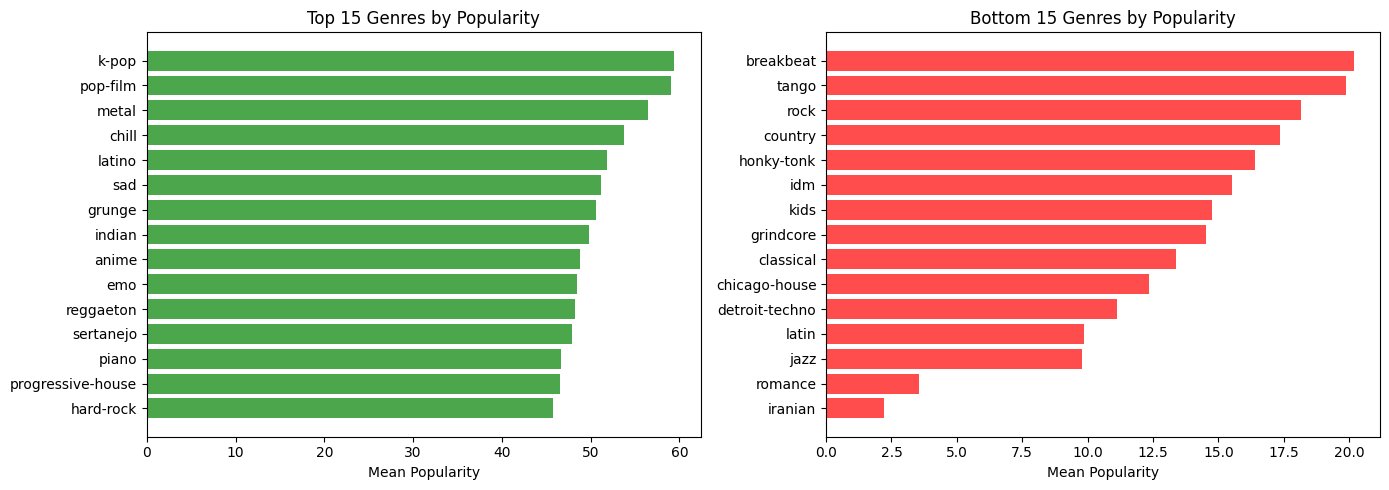

In [8]:
# Genre counts
print(f"Total genres: {df['track_genre'].nunique()}")
print("\n=== TOP 10 GENRES BY COUNT ===")
print(df['track_genre'].value_counts().head(10))

# Genre popularity comparison
genre_popularity = df.groupby('track_genre')['popularity'].agg(['mean', 'median', 'count'])
genre_popularity = genre_popularity.sort_values('mean', ascending=False)

# Top and bottom genres by popularity
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Top 15 genres
top_genres = genre_popularity.head(15)
axes[0].barh(top_genres.index, top_genres['mean'], color='green', alpha=0.7)
axes[0].set_xlabel('Mean Popularity')
axes[0].set_title('Top 15 Genres by Popularity')
axes[0].invert_yaxis()

# Bottom 15 genres
bottom_genres = genre_popularity.tail(15)
axes[1].barh(bottom_genres.index, bottom_genres['mean'], color='red', alpha=0.7)
axes[1].set_xlabel('Mean Popularity')
axes[1].set_title('Bottom 15 Genres by Popularity')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('../images/genre_popularity.png', dpi=150)
plt.show()

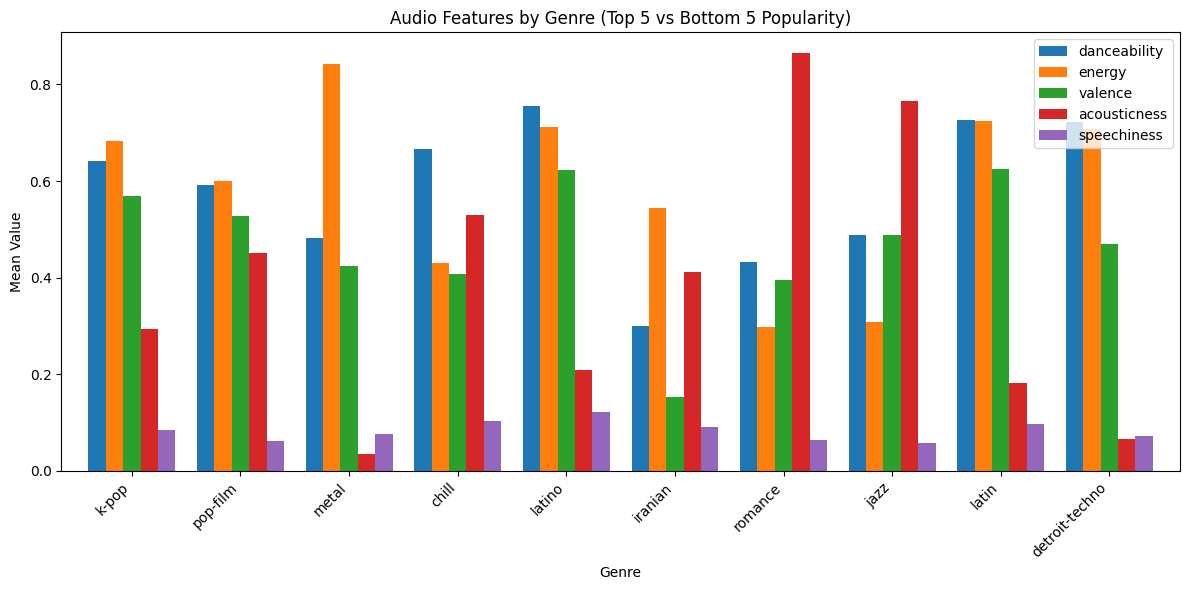

In [9]:
# Compare audio features across top genres
top_5_genres = ['k-pop', 'pop-film', 'metal', 'chill', 'latino']
bottom_5_genres = ['iranian', 'romance', 'jazz', 'latin', 'detroit-techno']

compare_genres = top_5_genres + bottom_5_genres
df_compare = df[df['track_genre'].isin(compare_genres)]

# Radar-style comparison with grouped bar
features = ['danceability', 'energy', 'valence', 'acousticness', 'speechiness']

genre_features = df_compare.groupby('track_genre')[features].mean()

fig, ax = plt.subplots(figsize=(12, 6))
genre_features.loc[compare_genres].plot(kind='bar', ax=ax, width=0.8)
plt.title('Audio Features by Genre (Top 5 vs Bottom 5 Popularity)')
plt.xlabel('Genre')
plt.ylabel('Mean Value')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('../images/genre_audio_features.png', dpi=150)
plt.show()